# Python中的切片详细图解

## 1. 基本数据结构

在看切片之前，先看看Python中的数组（列表）的基本概念，比起其他语言有些区别：

* 索引：Python中的索引分为正索引和负索引
* 切片的语法如：`[start:end:step]`
    * step：正负都可以，步进系数，绝对值大小决定了切取数据时的**步长**，正负号决定了切的方向，正——从左到右，负——从右到左，省略时的缺省值为1。
    * start：表示开始索引（包含索引本身），该参数省略时，从**端点**开始取值，如果step > 0，则从起点开始，如果 step < 0，则从终点开始。
    * end：终止索引（不包含索引本身），缺省时，标识取到数据**端点**，起点和重点看step，如果step > 0，则直到终点，如果 step < 0，则直到起点。
* 切片操作主要有三个维度：
    * 切片方向：很重要，切片时一定要清楚方向是从左到右还是从右到左。
    * 切片步进：步进（又称为步长） step 可能不为1，而是其他数据。
    * 索引：传统中的数组相关取值

整个数据结构如下图：

```python
data = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

```

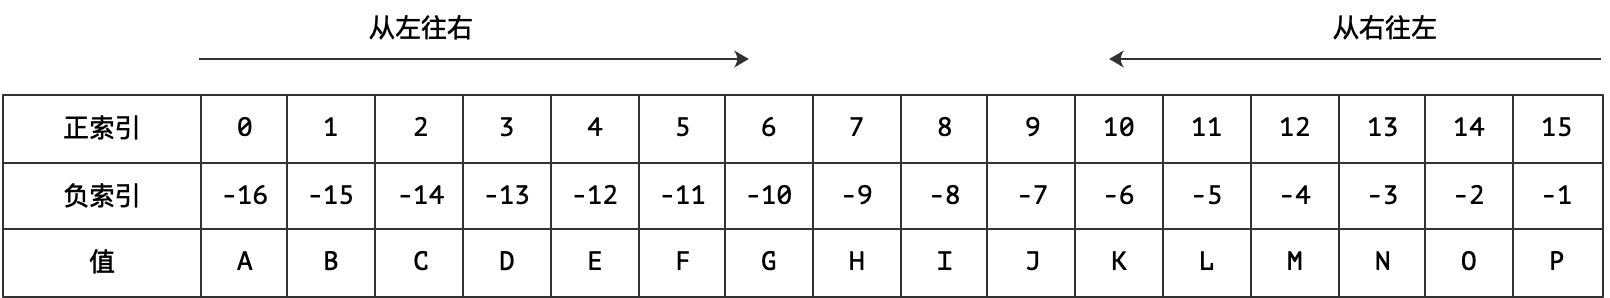

## 2. 切片的详细应用

### 2.1. 单索引直接取值

In [42]:
data = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
print(data[0])
print(data[3])
print(data[-3])

A
D
N


如果只提供了一个数值，则直接表示根据索引取单个值的，图解如下：

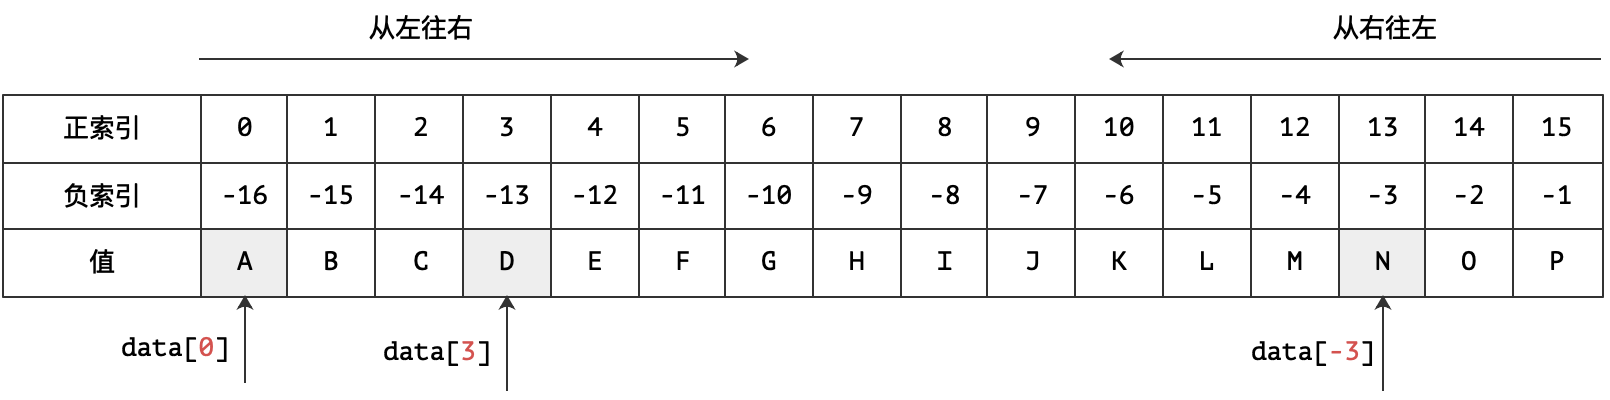

### 2.2. 双值切取得对象（子列表）

In [6]:
print(data[:])      # 从左往右
print(data[::-1])   # 从右往左

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
['P', 'O', 'N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


In [10]:
print(data[1:6])       # 正向取值
print(data[1:6:-1])    # （无效）负向取值  start > end
print(data[1:1:-1])    # （无效）负向取值  start = end
print(data[6:1:-1])    # 负向取值

['B', 'C', 'D', 'E', 'F']
[]
[]
['G', 'F', 'E', 'D', 'C']


先看上边部分的切片图解：

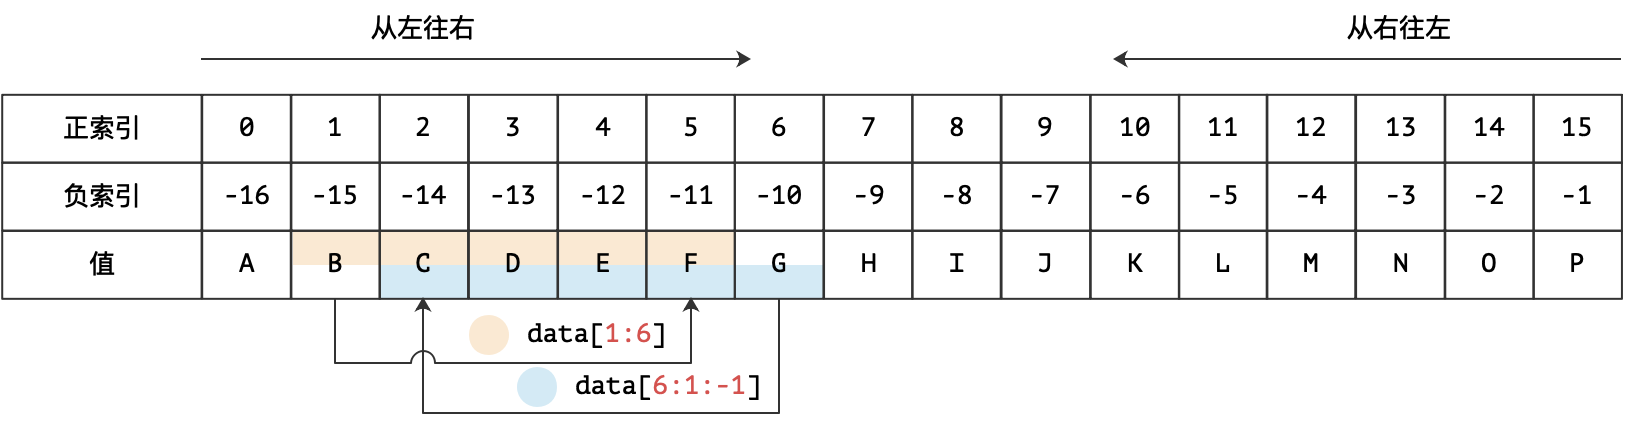

需要说明的几点：

* step不提供时默认值是1，从左往右切，切出来的数据结构还是列表。
* 如果 step < 0，`start >= end`时，切出来的内容为空。
* 使用`[1:6]`的语法时，起点索引是1，终止索引是6（不包含），最终范围：`1 -> 5`。
* 负向取值时，起点索引是6，终止索引不包含1，由于是从右往左，所以终止索引是1+1，也就是2，最终索引是：`6 -> 2`。

此处详细说明一下终止索引的**不包含**，最后一个`data[6:1:-1]`的语法读取时，起点索引很容易理解，终点索引是1，所以取值的索引如下：

```shell
# 传入参数（人阅读）
[6,5,4,3,2,1（不包含）]
# 索引值
[6,5,4,3,2]
```

最后一个索引是2，因为设置的是`6:1`，由于不包含`1`，所以应该是回退到上一个索引，从右到左，上一个索引是2，所以此处不是到1-1，而是1+1

### 2.3. 直接切片

In [20]:
print(data[:5])       # 不设置start，正向
print(data[:9:-1])    # 不设置start，负向

print(data[8:])       # 不设置end，正向
print(data[7::-1])    # 不设置end，负向

['A', 'B', 'C', 'D', 'E']
['P', 'O', 'N', 'M', 'L', 'K']
['I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


上边切片的图解如下

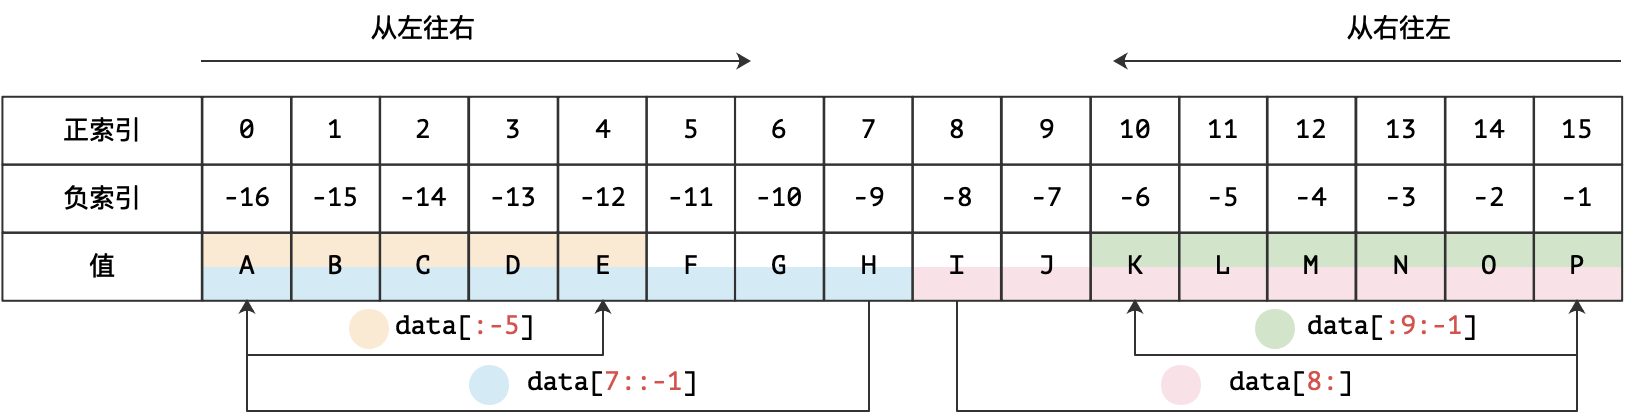

> 上边的图解说明了所有内容，细节内容读者可以自己思考。

### 2.4. start和end为负数

In [21]:
print(data[:-9])       # 不设置start，正向
print(data[:-5:-1])    # 不设置start，负向

print(data[-7:])       # 不设置end，正向
print(data[-8::-1])    # 不设置end，负向

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['P', 'O', 'N', 'M']
['J', 'K', 'L', 'M', 'N', 'O', 'P']
['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


上边切片的图解如下：

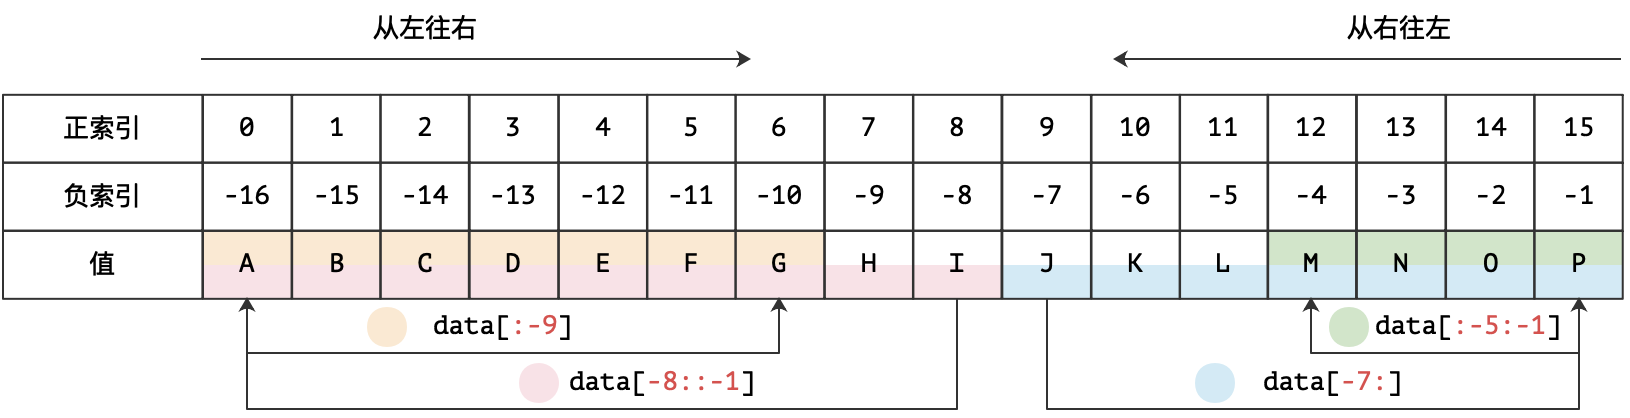

### 2.5. 混合切片

In [30]:
print(data[1:-10])   # start > 0, end < 0
print(data[1:-4:-1]) # 无效
print(data[-1:5])    # 无效
print(data[-1:7:-1]) # start < 0, end > 0

['B', 'C', 'D', 'E', 'F']
[]
[]
['P', 'O', 'N', 'M', 'L', 'K', 'J', 'I']


上边切片的图解如下：

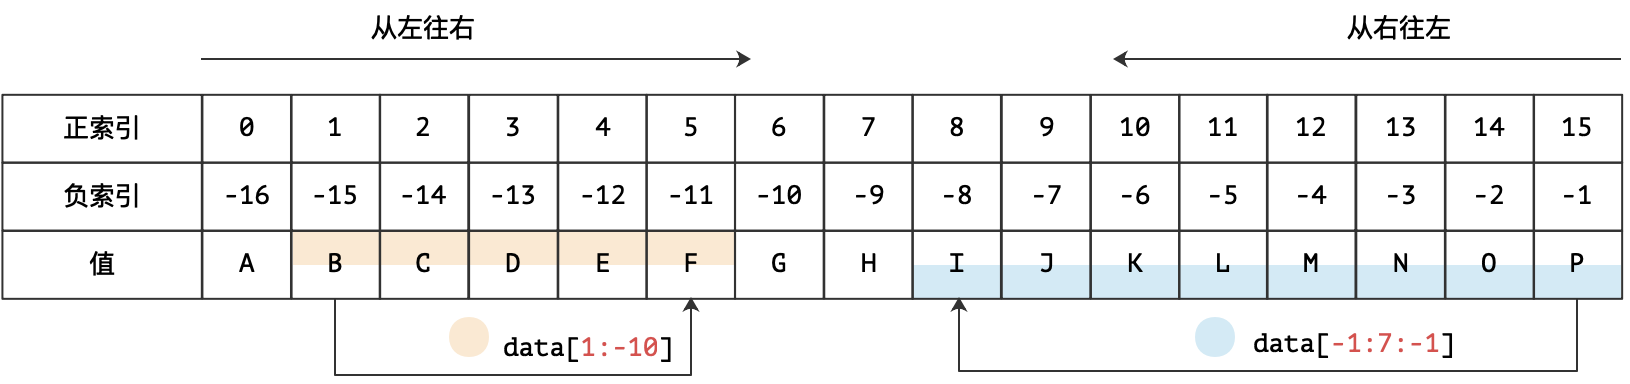

这种模式下，最好的办法是计算出等价模式：

* `data[1:-10]` 等价于 `data[1:6]`
* `data[-1:7:-1]` 等价于 `data[-1:-9:-1]`

In [31]:
print(data[1:6])
print(data[-1:-9:-1])

['B', 'C', 'D', 'E', 'F']
['P', 'O', 'N', 'M', 'L', 'K', 'J', 'I']


### 2.6. 连续切片

In [52]:
print(data[1:-4])
print(data[1:-4][-6:1:-1])

first = data[1:-4]
first[3] = '---'
print(first)
print(data[1:-4][-6:1:-1])

['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['G', 'F', 'E', 'D']
['B', 'C', 'D', '---', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['G', 'F', 'E', 'D']


切两次过后的变化如下：

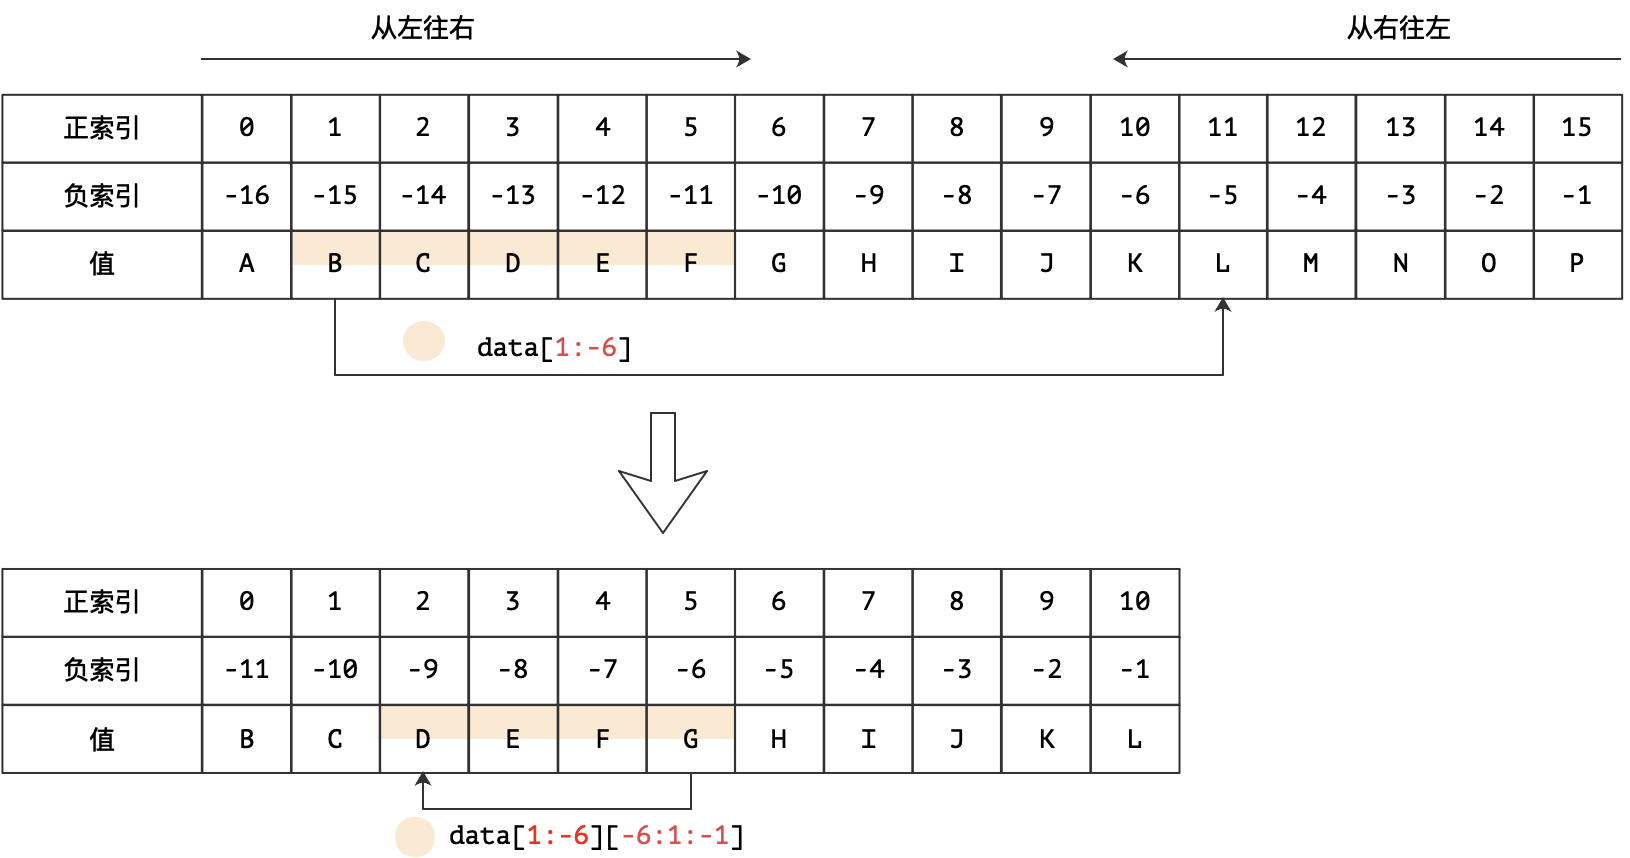

从上图可以知道切片执行了两次。

### 2.7. 步长为3的切片

In [44]:
print(data[1:13:3])

['B', 'E', 'H', 'K']


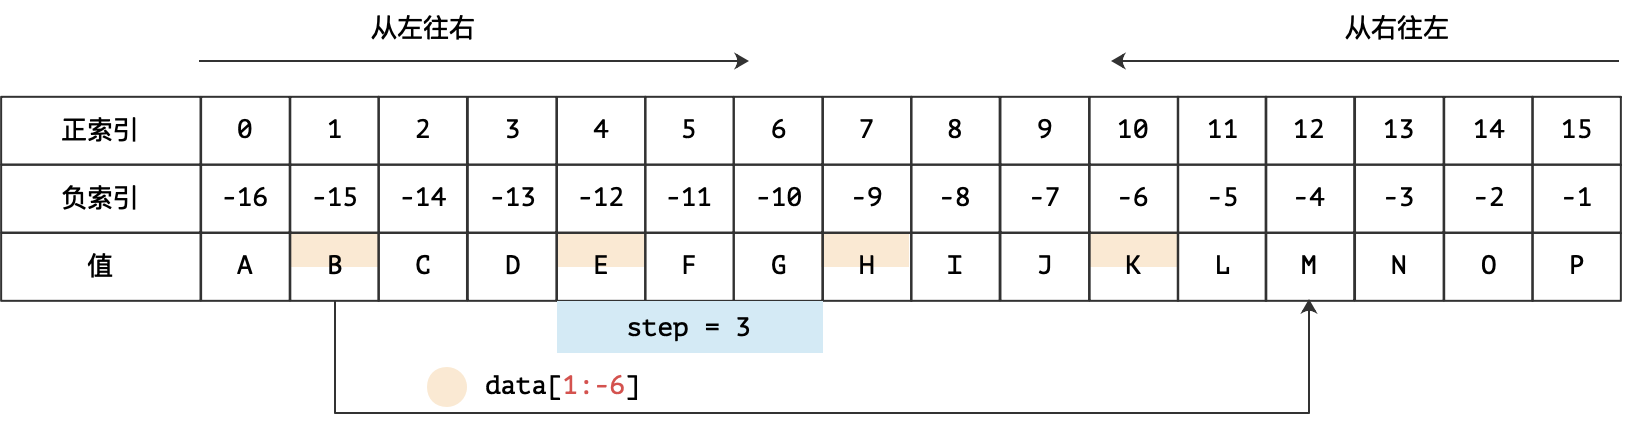

## 3. 常用切片操作

> 切片过后的结果会生成原始数据的一个拷贝

## 3.1. 读取偶数位置

In [67]:
result = data[::2]
print(result)

['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O']


## 3.2. 读取奇数位置

In [48]:
result = data[1::2]
print(result)

['B', 'D', 'F', 'H', 'J', 'L', 'N', 'P']


## 3.3. 拷贝整个对象

In [56]:
result = data[:]
print(result)
print("%d , %d" % (id(data),id(result)))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
4418792520 , 4418263496


> 「注」：`[:]`和`.copy()`都属于“浅拷贝”，只拷贝最外层元素，内层嵌套元素则通过引用，而不是独立分配内存。

## 3.4. insert 插入操作

In [60]:
copied = data[:]
copied[1:1] = ["A1"]
## 如果执行 copied[1:1] = "A1"，会解析成 "A","1" 插入
copied[1:1] = "X2"
print(data)
print(copied)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
['A', 'X', '2', 'A1', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']


## 3.5. 替换部分

In [65]:
copied = data[:]
copied[1:2] = ["X2"]
copied[2:4] = ["X3"]   # 两个元素转换成一个
print(data)
print(copied)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
['A', 'X2', 'X3', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']


## 3.6. 逆序

In [66]:
copied = data[:]
copied = copied[::-1]
print(copied)

['P', 'O', 'N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
